In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

# to read .csv files from another directory
location = "detect-pneumonia-spring-2024/" # "/<path>"

labels_train = pd.read_csv(location + "labels_train.csv")
labels_train

,file_name,class_id
0,img_4358977458434011046.jpg,1
1,img_5224016757187192130.jpg,2
2,img_3065202206106254707.jpg,2
3,img_6304894865561547174.jpg,1
4,img_3371338542810939877.jpg,2
...,...,...
4667,img_6661311872293090412.jpg,2
4668,img_3844568579349757418.jpg,1
4669,img_9145812369383814369.jpg,1
4670,img_1311393330250392648.jpg,1


In [7]:
labels_train['class_id'].value_counts()

class_id
1    2238
0    1227
2    1207
Name: count, dtype: int64

(1024, 1400)


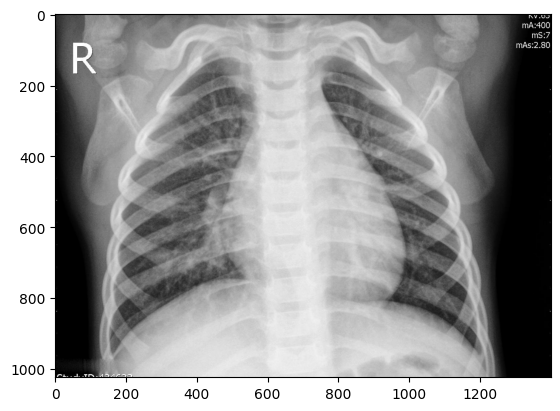

In [7]:
train_location = location + "train_images/train_images/"

img1 = cv2.imread(train_location + "img_1374178332135778.jpg", cv2.IMREAD_GRAYSCALE)
print(img1.shape)
plt.imshow(img1, cmap='gray')
# cv2.imshow('image', img1)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:
def resize_image(image_path, target_width, target_height):
    image = cv2.imread(image_path)
    (h, w) = image.shape[:2]

    # calculate the ratio of the target dimensions to the current dimensions
    rW = target_width / float(w)
    rH = target_height / float(h)

    # determine the new dimensions and ensure our aspect ratio is maintained
    new_width = int(w * rW)
    new_height = int(h * rH)

    # resize the image
    resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)
    return resized_image

def resize_all_images(folder_path, target_width, target_height):
  """
  Resizes all images in a folder while preserving their original names.

  Args:
      folder_path: Path to the folder containing the images.
      target_width: Target width for the resized images.
      target_height: Target height for the resized images.
  """
  for filename in os.listdir(folder_path):
    # Get the full image path
    image_path = os.path.join(folder_path, filename)
    
    # Check if it's a valid image file (modify extensions as needed)
    if filename.endswith(".jpg") or filename.endswith(".png"):
      # Resize the image
      resized_image = resize_image(image_path, target_width, target_height)

      # Save the resized image with the original name
      cv2.imwrite(image_path, resized_image)

In [10]:
folder_path = location + "train_images/train_images_resized/"
target_width = 224  # Adjust these values as needed
target_height = 224

resize_all_images(folder_path, target_width, target_height)

print("All images resized successfully!")

All images resized successfully!


test if the above image resized successfully

(224, 224)


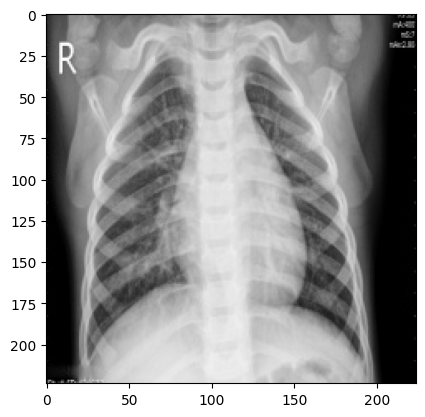

In [12]:
train_resized_location = location + "train_images/train_images_resized/"

img1_resized = cv2.imread(train_resized_location + "img_1374178332135778.jpg", cv2.IMREAD_GRAYSCALE)
print(img1_resized.shape)
plt.imshow(img1_resized, cmap='gray')